<a href="https://colab.research.google.com/github/JanghyukChoi/ML-Deeplearning-Basic/blob/main/Machine%20Learning/Machine_Learning_Losgistic_Regression_%26_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##로지스틱 회귀로 와인 분류하기



In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
from sklearn.model_selection import train_test_split
train_input , test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42) #20% 정도만 테스트 세트로 나둔다
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


한계가 있다. 일단 과소적합이고, 이 데이터로 누구한테 설명할 방법이 없다. 더 쉽게 만들어야한다.

##결정 트리 활용하기

의사결정 나무(Decision Tree)는 각 데이터들이 가진 속성들로부터 패턴을 찾아내서 분류 과제를 수행할 수 있도록 하는 지도학습 머신러닝 모델이다. 일종의 스무고개 같은 거라 생각하면 편하다. 그러면 질문을 잘 설계하는 게 중요하다. 이를 위해 고려해야 할 개념들을 하나씩 살펴보자.

지니 불순도 (Gini Impurity)

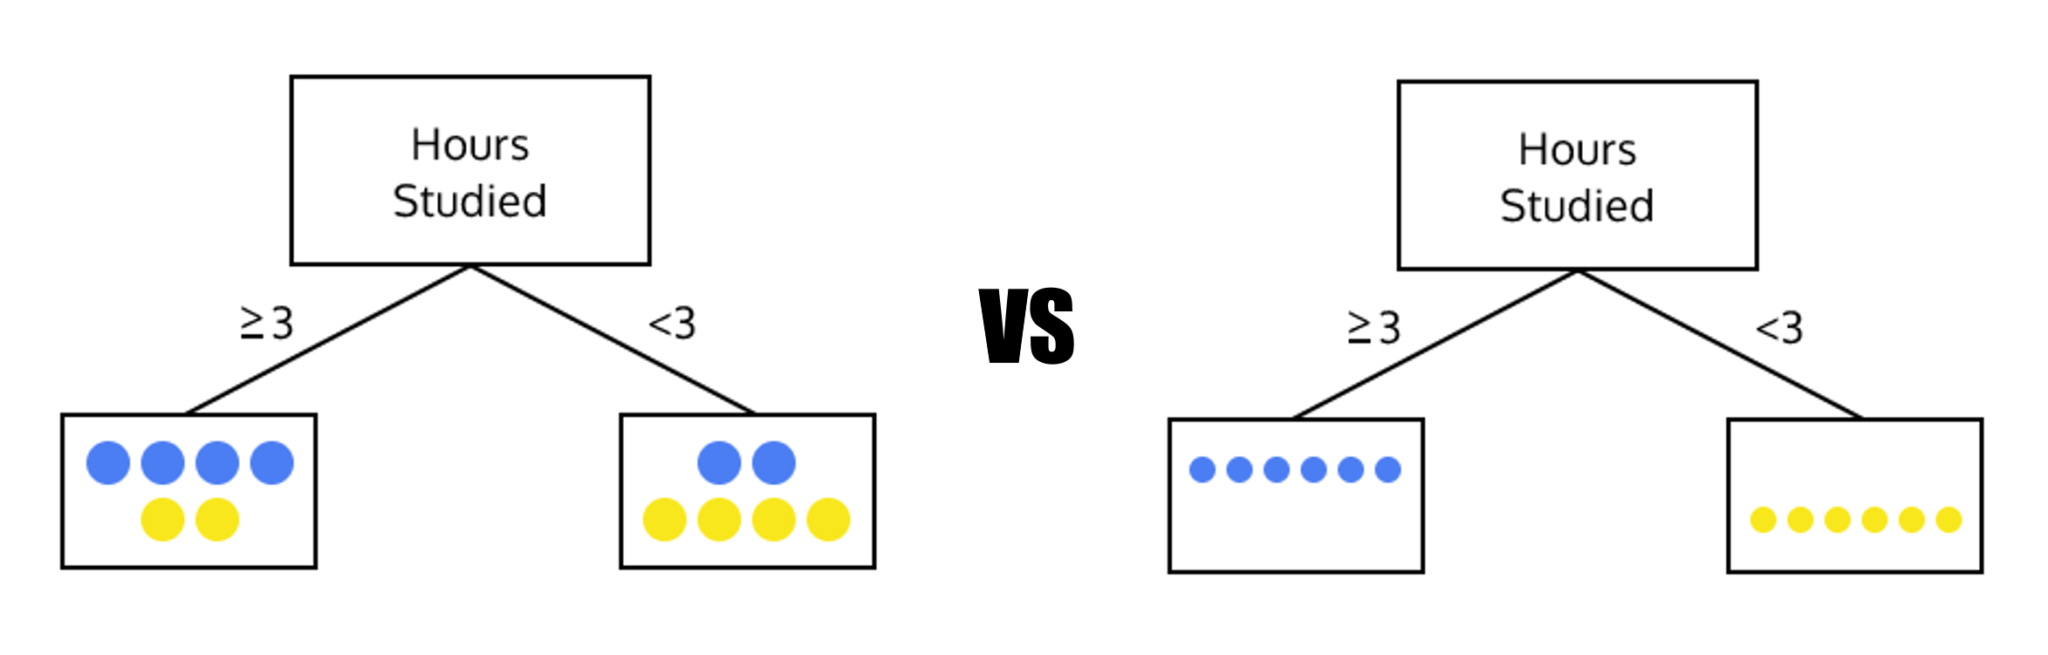

일단 왼쪽의 그림은 데이터 분할이 깔끔하지 않다. 우리의 목표는 오른쪽 그림처럼 불순물(?) 없이 완전 깔끔하게 골라내는 거다.

여기서 불순물이라는 표현을 썼는데, 이 불순물이 어느정도 포함되어 있는지 확인할 수 있는 지표로 지니 불순도(Gini Impurity) 값을 확인해볼 수 있다. 계산법은 꽤 간단하다. 1에서 ‘전체 데이터 개수 중 각 레이블이 차지하는 개수의 비율’을 제곱해서 빼주면 된다.

예를 들어 총 4개 데이터 세트에서 레이블 A가 3개, B가 1개 포함되어 있다면 이렇게 계산하면 된다. => 0.375

결국 좋은 질문을 거쳐 분할된 데이터 세트는 지니 불순도 값이 작다는 것을 알 수 있다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))
#과대적합이다

0.996921300750433
0.8592307692307692


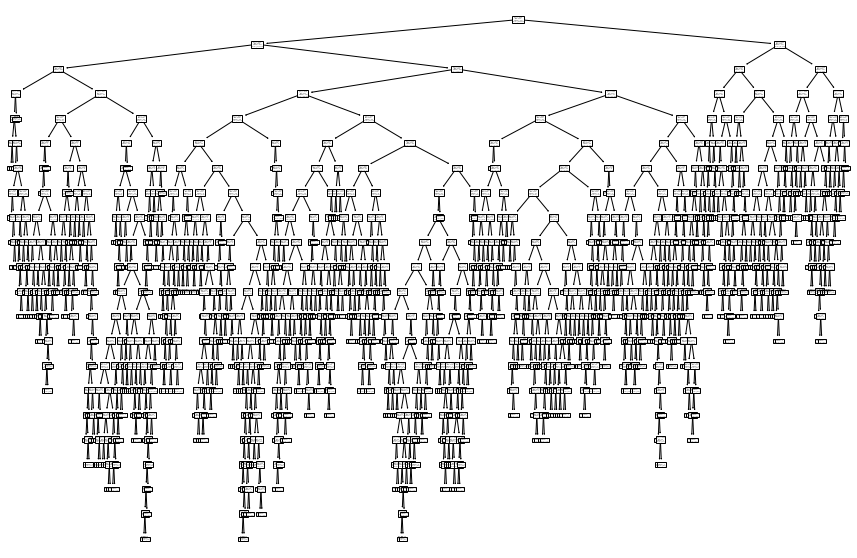

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt)
plt.show()

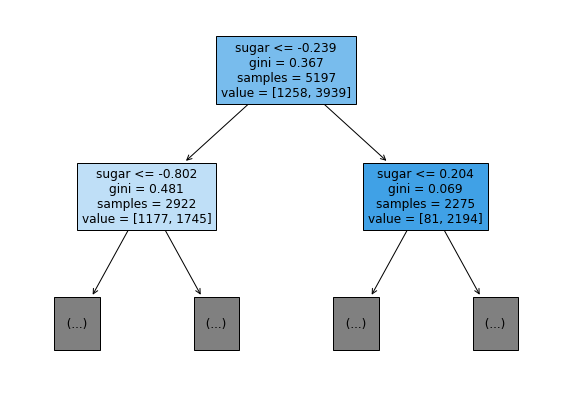

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

왼쪽이 yes, 오른쪽이 no다. 함수에서 filled=True 로 지정하면 클래스마다 색깔을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다. 아주 직관적이다.


즉, 결정 트리 알고리즘은 불순도 기준을 사용해 정보 이득(부모와 자식 노드 사이의 불순도 차이)이 최대가 되도록 노드를 분할한다. 노드를 순수하게 나눌수록 정보 이득이 커진다.

##가치치기

열매가 잘 맺기 위해 과수원에서 가지치기를 하는 것처럼 결정 트리도 가지치기를 해야한다. 그렇지 안흥면 무작정 끝까지 자라나는 트리가 만들어진다. 결정 트리에서 가지치기를 하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것이다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


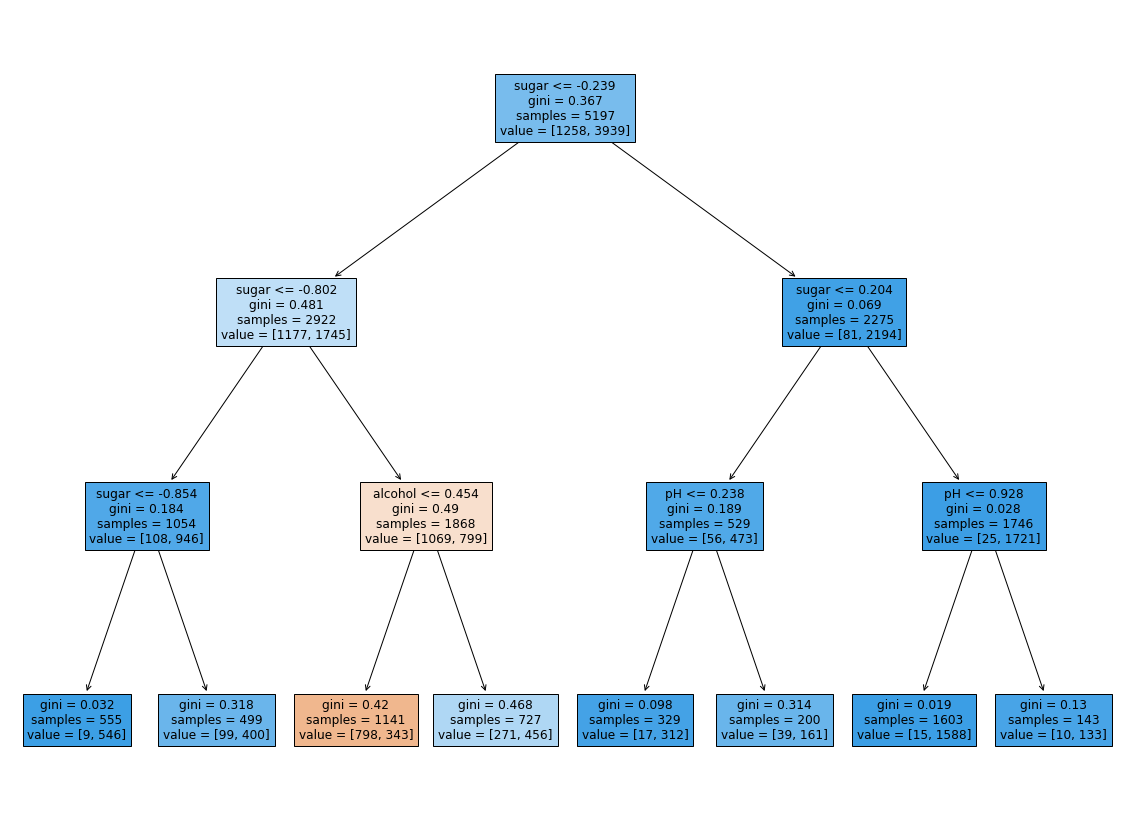

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

앞서 불순도를 기준으로 샘플을 나눈다고 했다. 불순도는 클래스별 비율을 가지고 계산한다. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까? 아니다. 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 따라서 전처리 과정이 필요없다.

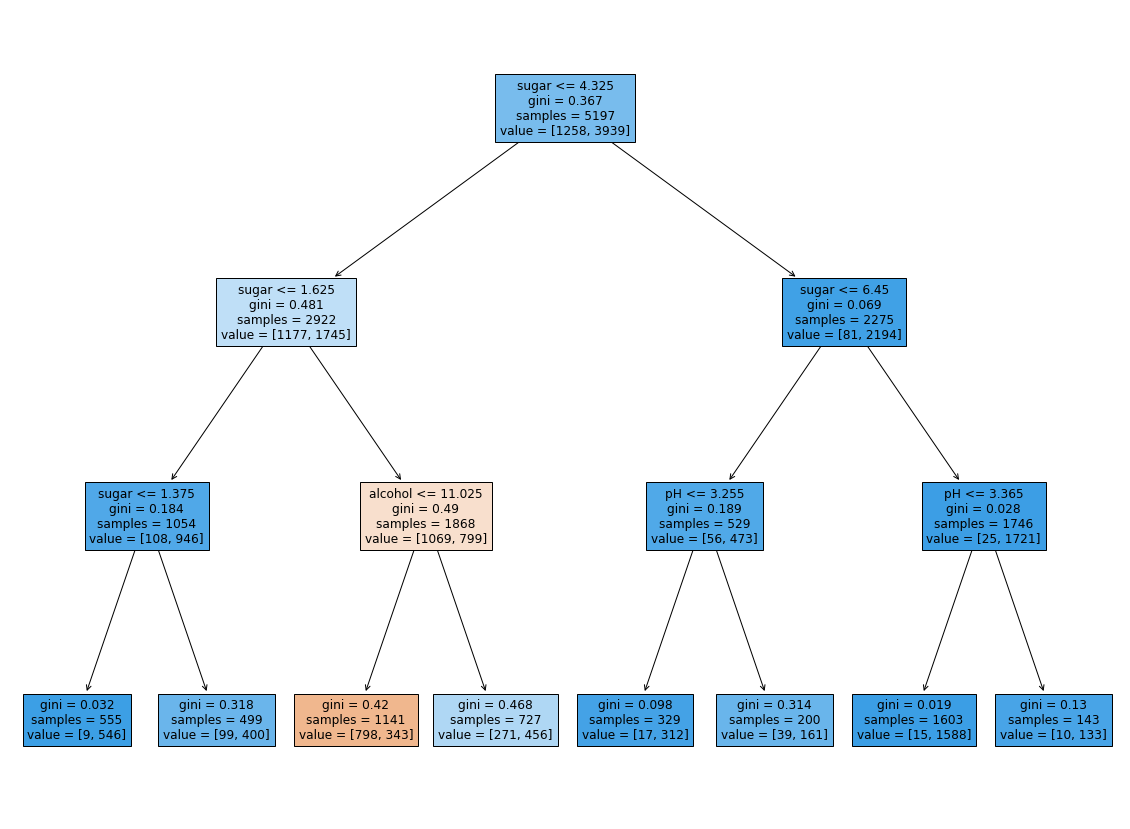

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input, train_target)
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않은 터라 이해하기 훨씬 쉽다. 당도가 1.625보다 크고 4.3보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드 와인이다. 그 외에는 모두 화이트 와인으로 예측했다.

마지막으로 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해준다.

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


DecisionTreeClassifier(max_depth=3, random_state=42)

두번째 특성인 당도가 0.87 정도로 특성 중요가 가장 높다. 그 다음 알코올 도수, pH순이다. 이처럼 결정트리는 깊이가 너무 깊지만 않다면 비교적 다른 사람들에게 설명하기 쉽다.